In [332]:
import numpy as np
import pandas as pd
import requests, os
import time
import random
import swifter
# import csv
# import datetime as dt
# import json
# import os
# import statistics
from collections import Counter
import matplotlib.pyplot as plt

from fake_useragent import UserAgent
ua = UserAgent()

user_agent = {'User-agent': ua.random}

def get_request(url, parameters=None, rate=60): 
    response = None
    while not response:
        try:
            response = requests.get(url=url, params=parameters, headers=user_agent)
            if not response:
                print('None response. Trying again in {} seconds...'.format(rate))
#                 toggle_vpn()
                time.sleep(rate)
        except:
            print('Request Exception. Trying again in 5 sec...')
            time.sleep(5)
            continue
        
    
    return response.json()

def flatten(t):
    return [item for sublist in t for item in sublist]

In [333]:
df = pd.read_csv('data/combined_cleaned.csv')
df = df[df['owners'] > 1000000][['appid','name','categories','genres','tags']]
df['tags'] = df['tags'].swifter.apply(lambda x: x.lower())
df['categories'] = df['categories'].swifter.apply(lambda x: x.lower())
df['genres'] = df['genres'].swifter.apply(lambda x: x.lower())

df['tags'] = df['tags'].swifter.apply(lambda x: x.split(', '))
df['categories'] = df['categories'].swifter.apply(lambda x: x.split(', '))
df['genres'] = df['genres'].swifter.apply(lambda x: x.split(', '))

df.head(50)

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

,appid,name,categories,genres,tags
0,10,Counter-Strike,"[multi-player, pvp, online pvp, shared/split s...",[action],"[fps, multiplayer, shooter, classic, team-base..."
1,20,Team Fortress Classic,"[multi-player, pvp, online pvp, shared/split s...",[action],"[fps, multiplayer, classic, hero shooter, shoo..."
2,30,Day of Defeat,"[multi-player, valve anti-cheat enabled]",[action],"[fps, world war ii, multiplayer, shooter, war,..."
3,40,Deathmatch Classic,"[multi-player, pvp, online pvp, shared/split s...",[action],"[fps, classic, multiplayer, shooter, first-per..."
4,50,Half-Life: Opposing Force,"[single-player, multi-player, valve anti-cheat...",[action],"[fps, classic, sci-fi, singleplayer, shooter, ..."
5,60,Ricochet,"[multi-player, pvp, online pvp, valve anti-che...",[action],"[fps, multiplayer, classic, first-person, sci-..."
6,70,Half-Life,"[single-player, multi-player, pvp, online pvp,...",[action],"[fps, sci-fi, singleplayer, 1990's, shooter, m..."
7,80,Counter-Strike: Condition Zero,"[single-player, multi-player, valve anti-cheat...",[action],"[fps, shooter, multiplayer, first-person, clas..."
8,130,Half-Life: Blue Shift,"[single-player, remote play together]",[action],"[fps, sci-fi, singleplayer, shooter, aliens, c..."
9,220,Half-Life 2,"[single-player, steam achievements, steam trad...",[action],"[fps, sci-fi, classic, singleplayer, story ric..."


In [334]:
categories_list = flatten(df['categories'].tolist())
categories_set = set(categories_list)
categories_set = categories_set | set([x.replace('-','') for x in categories_set])

In [335]:
tags_list = flatten(df['tags'].tolist())
tags_set = set(tags_list)

In [336]:
counted = Counter(tags_list)


In [337]:
to_delete = (
    [x[0] for x in counted.most_common()[:7]] 
    + list(categories_set)
#     + [x[0] for x in counted.most_common() if x[1] < 15]
)
df['tags'] = df['tags'].swifter.apply(lambda x: [y for y in x if y not in to_delete])

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

In [338]:
top_tags_list = (df['tags'].swifter.apply(lambda x: x[0]).tolist())
top_counted = Counter(top_tags_list)

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

In [339]:
top_counted.most_common()[-1][1]

1

In [340]:

lowest_count = top_counted.most_common()[-1][1]

while lowest_count < 21:
    print(lowest_count)
    df['tags'] = df['tags'].swifter.apply(lambda x: [y for y in x if top_counted[y] != lowest_count])
    top_tags_list = (df['tags'].swifter.apply(lambda x: x[0] if len(x) != 0 else '').tolist())
    top_counted = Counter(top_tags_list)
    try:
        top_counted.pop('')
    except:
        continue
    lowest_count = top_counted.most_common()[-1][1]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

2


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

2


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

3


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

4


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

3


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

5


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

6


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

2


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

7


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

8


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

9


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

10


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

11


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

12


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

13


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

14


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

15


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

18


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

19


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

20


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

1


Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

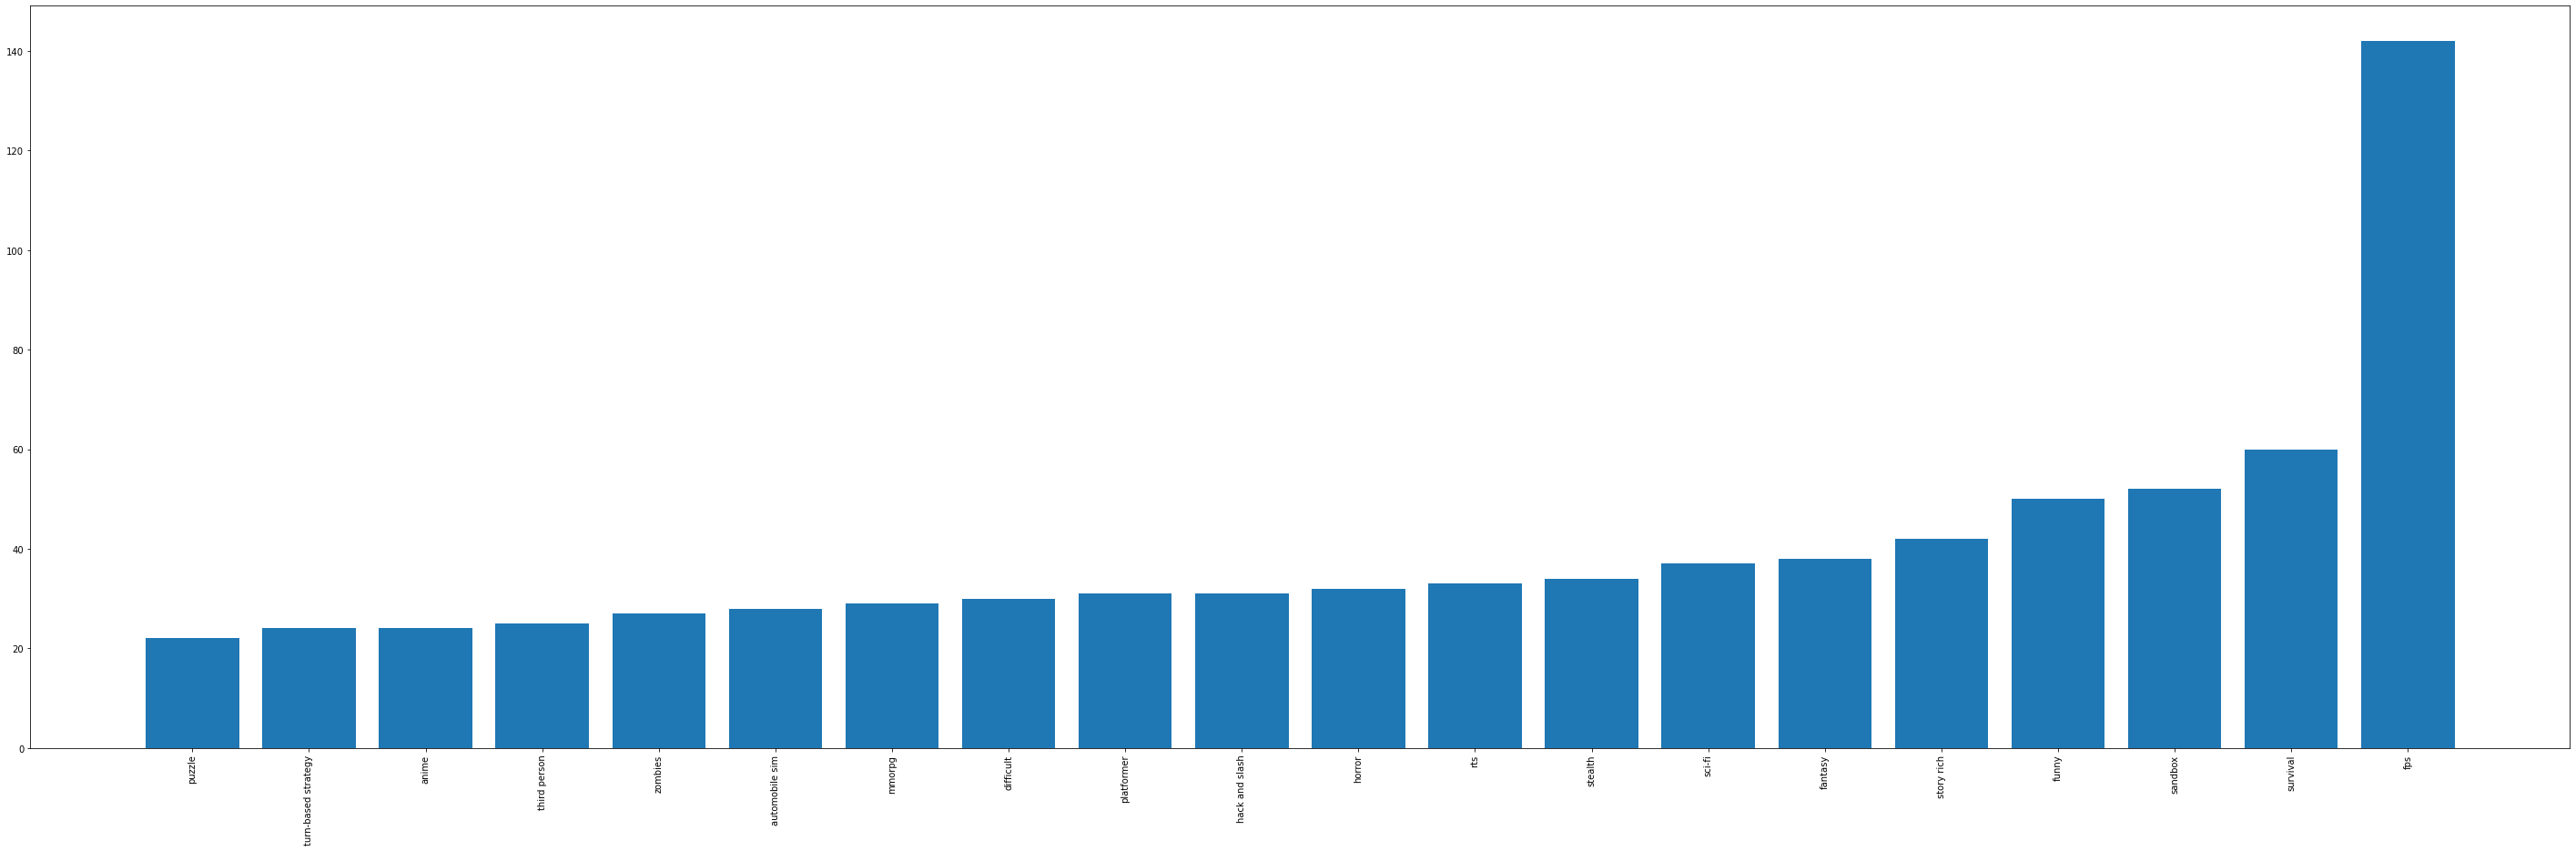

In [341]:
plt.figure(figsize=(50,15))
plt.bar(*zip(*sorted(top_counted.items(), key=lambda item: item[1])))
plt.xticks(rotation=90)

plt.show()

In [342]:
df = df[df['tags'].map(lambda x: len(x)) != 0]

In [343]:
# df['tags'] = df['tags'].swifter.apply(lambda x: sorted(x, key=lambda y: counted[y], reverse=True))
df['tags'] = df['tags'].swifter.apply(lambda x: x[0])


Pandas Apply:   0%|          | 0/791 [00:00<?, ?it/s]

In [345]:
df.to_csv('data/shrunktags.csv')

In [347]:
for key in top_counted.keys():
    try:
        os.makedirs('images/'+key) 
    except:
        pass

In [348]:
df

,appid,name,categories,genres,tags
0,10,Counter-Strike,"[multi-player, pvp, online pvp, shared/split s...",[action],fps
1,20,Team Fortress Classic,"[multi-player, pvp, online pvp, shared/split s...",[action],fps
2,30,Day of Defeat,"[multi-player, valve anti-cheat enabled]",[action],fps
3,40,Deathmatch Classic,"[multi-player, pvp, online pvp, shared/split s...",[action],fps
4,50,Half-Life: Opposing Force,"[single-player, multi-player, valve anti-cheat...",[action],fps
...,...,...,...,...,...
37076,1353950,Ring of Fire: Prologue,[single-player],"[adventure, casual, free to play, indie, simul...",story rich
37390,1366540,Dyson Sphere Program,"[single-player, remote play on tablet]","[indie, simulation, strategy, early access]",sci-fi
38283,1399780,Spellbreak,"[multi-player, pvp, online pvp, cross-platform...","[action, adventure, free to play, rpg]",fantasy
38898,1426210,It Takes Two,"[multi-player, co-op, online co-op, shared/spl...","[action, adventure]",puzzle


In [322]:
class_counts.head(50)

fps                    142
survival                60
sandbox                 52
funny                   50
story rich              42
fantasy                 38
sci-fi                  37
stealth                 34
rts                     33
horror                  32
platformer              31
hack and slash          31
difficult               30
mmorpg                  29
automobile sim          28
zombies                 27
third person            25
turn-based strategy     24
anime                   24
puzzle                  22
Name: tags, dtype: int64

In [ ]:
app_list = list(df['appid'])
url = "http://store.steampowered.com/api/appdetails/"

for i in range(len(app_list)):
    appid = app_list[i]
    parameters = {"appids": appid}
    print(i)
#     time.sleep(0.5)
    
    json_data = get_request(url, parameters=parameters, rate=10)[str(appid)]


    if json_data['success']:
        json_data = json_data['data']
    else:
        json_data = {'steam_appid': appid}
    
    try:
        json_data['screenshots'] = [x['path_thumbnail'] for x in json_data['screenshots']]
    except:
        json_data['screenshots'] = []

  

    json_data = {k: json_data[k] for k in ['steam_appid','screenshots','name']}    
    screenshots = pd.DataFrame.from_dict({i: json_data}, orient='index')
    if not os.path.isfile('data/screenshots.csv'):
        screenshots.to_csv('data/screenshots.csv', index=True)
    else:
        screenshots.to_csv('data/screenshots.csv', mode='a', header=False, index=True)

In [356]:
import ast

In [374]:
screenshot_df = pd.read_csv('data/screenshots.csv',index_col=0)
screenshot_df['screenshots'] = screenshot_df['screenshots'].swifter.apply(lambda x: ast.literal_eval(x))

Pandas Apply:   0%|          | 0/807 [00:00<?, ?it/s]

In [375]:
screenshot_df

,steam_appid,screenshots,name
0,10,[https://cdn.akamai.steamstatic.com/steam/apps...,Counter-Strike
1,20,[https://cdn.akamai.steamstatic.com/steam/apps...,Team Fortress Classic
2,30,[https://cdn.akamai.steamstatic.com/steam/apps...,Day of Defeat
3,40,[https://cdn.akamai.steamstatic.com/steam/apps...,Deathmatch Classic
4,50,[https://cdn.akamai.steamstatic.com/steam/apps...,Half-Life: Opposing Force
...,...,...,...
802,1366540,[https://cdn.akamai.steamstatic.com/steam/apps...,Dyson Sphere Program
803,1399780,[https://cdn.akamai.steamstatic.com/steam/apps...,Spellbreak
804,1407200,[https://cdn.akamai.steamstatic.com/steam/apps...,World of Tanks
805,1426210,[https://cdn.akamai.steamstatic.com/steam/apps...,It Takes Two


In [383]:
images_tag = pd.merge(screenshot_df,df,how='inner',left_on='steam_appid',right_on='appid')[['screenshots','tags']].groupby('tags')['screenshots'].agg(lambda x: sum(x,[])).to_dict()

In [1]:
images_tag


NameError: name 'images_tag' is not defined

In [386]:
for tag in images_tag.keys():
    for i, image in enumerate(images_tag[tag]):
        response = requests.get(image)
        file = open('images/'+tag+'/'+str(i)+'.png', "wb")
        file.write(response.content)
        file.close()

In [2]:
from pathlib import Path

In [5]:
root = Path('images')

In [10]:
class_counts = dict()
for klass in root.iterdir():
    if klass.is_dir():
        class_counts[klass.name] = len(list(klass.iterdir()))
        
class_counts

{'platformer': 400,
 'difficult': 348,
 'third person': 310,
 'turn-based strategy': 251,
 'puzzle': 225,
 'rts': 402,
 'story rich': 522,
 'sci-fi': 552,
 'zombies': 453,
 'funny': 672,
 'horror': 369,
 'sandbox': 740,
 'automobile sim': 679,
 'mmorpg': 422,
 'stealth': 404,
 'anime': 329,
 'hack and slash': 428,
 'fps': 1888,
 'survival': 828,
 'fantasy': 455}